In [46]:
import networkx as nx  # Сүлжээний шинжилгээний networkx сангийн эхлэл
import pandas as pd  # Өгөгдлийг боловсруулахад зориулсан pandas сангийн эхлэл
import matplotlib.pyplot as plt  # Зураг үзүүлэх matplotlib сангийн эхлэл
import numpy as np  # Тоон тооцоололд зориулсан numpy сангийн эхлэл

In [47]:
def read_net_w(filename):  # Файлаас жинтэй сүлжээг уншиж авах функц
    g = nx.Graph()  # Шинэ граф үүсгэх
    with open(filename) as f:  # Файлыг нээж уншуулах
        f.readline()  # Толгой мөрийг алгасах
        for l in f:  # Файлын мөр бүрээр давтах
            l = l.split(",")  # Мөрийг таслалаар хуваах
            g.add_edge(l[0], l[1], weight=int(l[2]))  # Граф руу ирмэгүүдийг нэмэх
    return g  # Бүрэн бүтсэн графыг буцаах

# Game of Thrones data
season = 6  # Дуртай Хаадын Тоглоом цувралын 6-р ангийг сонгох
g = read_net_w(f'asioaf/got-s{season}-edges.csv')  # Сонгосон ангийн өгөгдлийг уншиж авах

In [48]:
nx.has_bridges(g)  # Граф дахь гүүрийг шалгах

True

In [49]:
list(nx.bridges(g))  # Граф дахь бүх гүүрийг жагсаалтаар харуулах

[('JON', 'SAM'),
 ('JON', 'JEOR'),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ'),
 ('TYRION', 'AERYS'),
 ('DAVOS', 'SHIREEN'),
 ('SAM', 'MAESTER_AEMON'),
 ('CERSEI', 'MOUNTAIN'),
 ('TORMUND', 'MANCE'),
 ('HOUND', 'GATINS'),
 ('BRYNDEN', 'MINISA'),
 ('EDMURE', 'HOSTER'),
 ('QYBURN', 'ARTHUR_CHILD'),
 ('NED', 'RICKARD_STARK')]

In [50]:
list(nx.local_bridges(g, with_span=True))  # Орон нутгийн гүүрүүдийг тэдгээрийн далайцтай харгалзуулан жагсаах

[('JON', 'SAM', inf),
 ('JON', 'JEOR', inf),
 ('MISSANDEI', 'KRAZNYS_MO_NAKLOZ', inf),
 ('TYRION', 'AERYS', inf),
 ('VARYS', 'STANNIS', 3),
 ('ARYA', 'WALDER', 3),
 ('DAVOS', 'SHIREEN', inf),
 ('SAM', 'MAESTER_AEMON', inf),
 ('CERSEI', 'MOUNTAIN', inf),
 ('TORMUND', 'MANCE', inf),
 ('HOUND', 'GATINS', inf),
 ('BRYNDEN', 'MINISA', inf),
 ('EDMURE', 'HOSTER', inf),
 ('QYBURN', 'ARTHUR_CHILD', inf),
 ('NED', 'RICKARD_STARK', inf)]

In [51]:
def node_overlap(g):  # Хөршүүдийн давхцал тооцох функц
    for u, v in g.edges():  # Граф дахь бүх ирмэгүүдээр давтах
        n_u = set(g.neighbors(u))  # u оройн хөршүүдийн олонлог
        n_v = set(g.neighbors(v))  # v оройн хөршүүдийн олонлог
        overlap = len(n_u & n_v) / len(n_u | n_v)  # Хөршүүдийн давхцлын коэффициент тооцох
        g[u][v]['overlap'] = overlap  # Хөршүүдийн давхцлыг ирмэгт шинж чанар болгон нэмэх
    return g  # Шинэчилсэн графыг буцаах

In [52]:
g = node_overlap(g) # Хөршүүдийн давхцлыг графт нэмэх

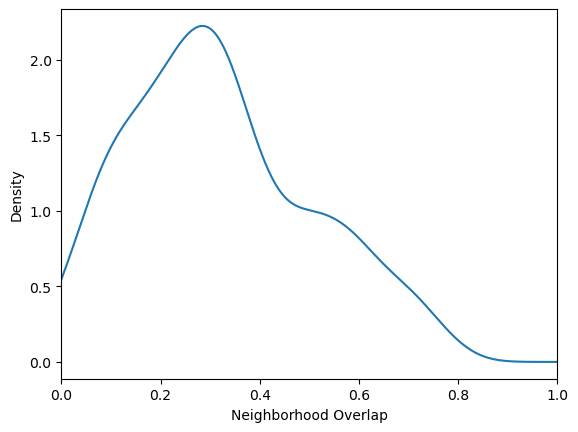

In [53]:
weights = [e[-1]['overlap'] for e in g.edges(data=True)]  # Хөршүүдийн давхцлын жинг жагсаалтаар авах
pd.DataFrame(weights)[0].plot.kde()  # Хөршүүдийн давхцлын түгэлтийг КДЭ төрлөөр харуулах
plt.xlabel("Neighborhood Overlap")  # Х тэнхлэгийн нэрийг тохируулах
plt.xlim(0,1)  # Х тэнхлэгийн хязгаарыг тохируулах
plt.show()  # Зургийг харуулах

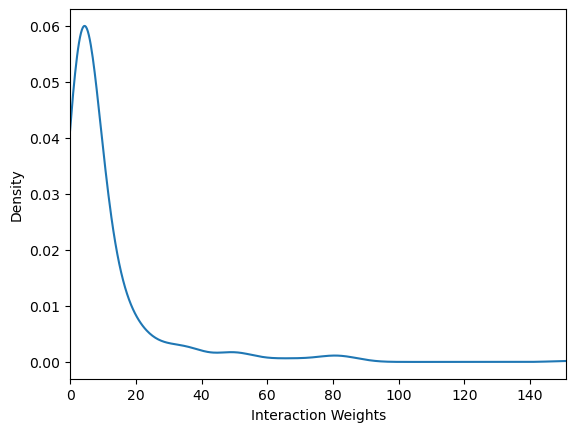

In [54]:
weights_got = [d['weight'] for u,v,d in g.edges(data=True)]  # Ирмэгүүдийн жинг жагсаалтаар авах
pd.DataFrame(weights_got)[0].plot.kde()  # Ирмэгүүдийн жингийн түгэлтийг КДЭ төрлөөр харуулах
plt.xlabel("Interaction Weights")  # Х тэнхлэгийн нэрийг тохируулах
plt.xlim(0,max(weights_got))  # Х тэнхлэгийн хязгаарыг тохируулах
plt.show()  # Зургийг харуулах

In [55]:
# Random
er = nx.erdos_renyi_graph(1000, 0.001)  # Эрдөш-Рени санамсаргүй графыг үүсгэх
# Scale-free
ba = nx.barabasi_albert_graph(1000, 2)  # Барабаши-Алберт масштабын бие даасан графыг үүсгэх

In [56]:
er_degs = list(dict(er.degree()).values())  # Эрдөш-Рени графын зэргийн жагсаалтыг авах
ba_degs = list(dict(ba.degree()).values())  # Барабаши-Алберт графын зэргийн жагсаалтыг авах

In [57]:
def molloy_reed(degrees):  # Моллой-Рид параметрийг тооцох функц
    return (np.mean(degrees)*(np.mean(degrees)+1))/np.mean(degrees)  # Моллой-Рид функцийн тооцоололыг хийх

def breakdown_threshold(degrees):  # Задрах босгыг тооцох функц
    K = molloy_reed(degrees)  # Моллой-Рид параметрийг тооцох
    return 1 - (1/(K-1))  # Задрах босгыг тооцох томъёо

In [58]:
molloy_reed(er_degs)  # Эрдөш-Рени графын Моллой-Рид параметрийг тооцох

1.968

In [59]:
breakdown_threshold(er_degs)  # Эрдөш-Рени графын задрах босгыг тооцох

-0.03305785123966953

In [60]:
molloy_reed(ba_degs)  # Барабаши-Алберт графын Моллой-Рид параметрийг тооцох

4.992

In [61]:
breakdown_threshold(ba_degs)  # Барабаши-Алберт графын задрах босгыг тооцох

0.7494989979959921

In [62]:
def random_node(g):  # Графаас санамсаргүй орой сонгох функц
    return [np.random.choice(g.nodes())]  # Графын оройнуудаас санамсаргүй нэгийг сонгох

def dismantle(g, function, **args):  # Графыг алгуур задалж холбогдсон бүрдлүүдийг тооцох функц
    total_nodes = g.number_of_nodes()  # Графын нийт оройнуудын тоог авах
    removed_nodes = []  # Хасагдсан оройнуудын жагсаалт
    components = []  # Холбогдсон бүрдлүүдийг хадгалах жагсаалт
    while len(g.nodes()) > 1:  # Графт нэгээс олон орой байх хүртэл давтах
        n = function(g, **args)[0]  # Заасан функцийг ашиглан орой сонгох
        g.remove_node(n)  # Сонгосон оройг графаас хасах
        removed_nodes.append((len(removed_nodes)+1)/total_nodes)  # Хасагдсан оройнуудын харьцааг тооцох
        comps = list(nx.connected_components(g))  # Графын холбогдсон бүрдлүүдийг олох
        g_size = 0  # Хамгийн том бүрдлийн хэмжээг тэгээр эхлүүлэх
        if len(comps)>0:  # Холбогдсон бүрдэл байвал
            g_size  = max([len(c)for c in comps])/total_nodes  # Хамгийн том бүрдлийн хэмжээг тооцох
        components.append(g_size)  # Хамгийн том бүрдлийн хэмжээг хадгалах
    return removed_nodes, components  # Хасагдсан оройнуудын харьцаа болон холбогдсон бүрдлүүдийг буцаах

def get_sorted_nodes(g, score, reverse=True):  # Оройнуудыг оноогоор нь эрэмбэлэх функц
    nodes = score(g)  # Оройнуудын оноог тооцох
    if isinstance(nodes, dict):  # Хэрэв оноонууд нь толь бичиг бол
        nodes = [(k, v) for k, v in nodes.items()]  # Оройнуудыг тэдгээрийн оноотой хослуулах
    srt = sorted(nodes, key = lambda k: k[1], reverse = reverse)  # Оройнуудыг оноогоор нь эрэмбэлэх
    return [x[0] for x in srt]  # Эрэмбэлсэн оройнуудыг буцаах

def plot_dismantle(x, y):  # Графын задрах үйл явцыг дүрслэх функц
    plt.plot(x, y)  # Графын задрах үйл явцыг дүрслэх
    plt.xlabel("Removed Nodes")  # Х тэнхлэгийн нэрийг тохируулах
    plt.ylabel("Giant Component size")  # Y тэнхлэгийн нэрийг тохируулах
    plt.show()  # Зургийг харуулах

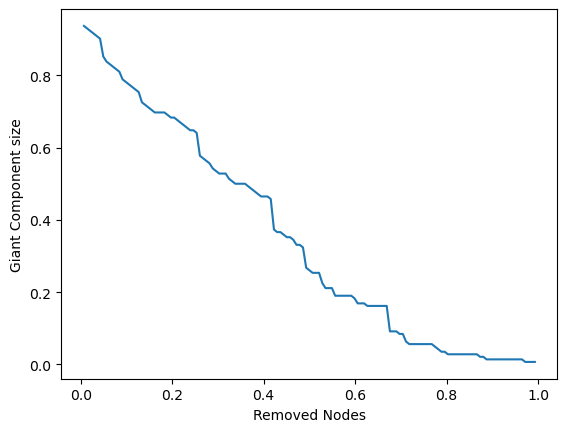

In [63]:
h = g.copy()  # Графын хуулбарыг үүсгэх
rn, comps = dismantle(h, random_node)  # Санамсаргүй оройнуудыг хасах стратегийг хэрэглэх
plot_dismantle(rn, comps)  # Задрах үйл явцыг дүрслэх

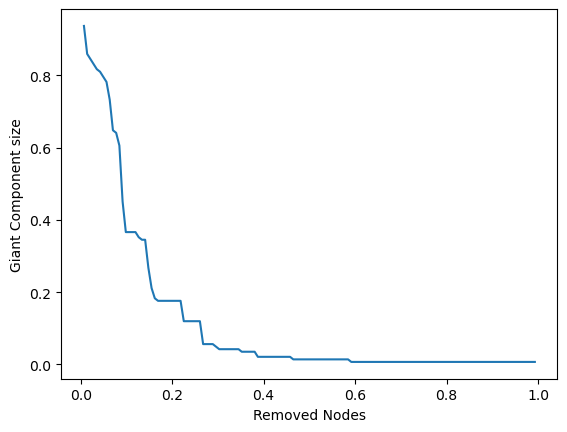

In [64]:
h = g.copy()  # Графын хуулбарыг үүсгэх
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree)  # Орой бүрийн зэргийг үндэслэн оройнуудыг хасах
plot_dismantle(rn, comps)  # Задрах үйл явцыг дүрслэх

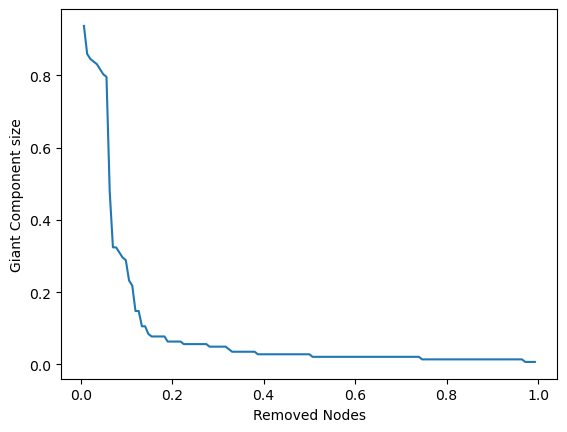

In [65]:
h = g.copy()  # Графын хуулбарыг үүсгэх
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality)  # Төвшилтийн төвтэй байдлаар оройнуудыг хасах
plot_dismantle(rn, comps)  # Задрах үйл явцыг дүрслэх

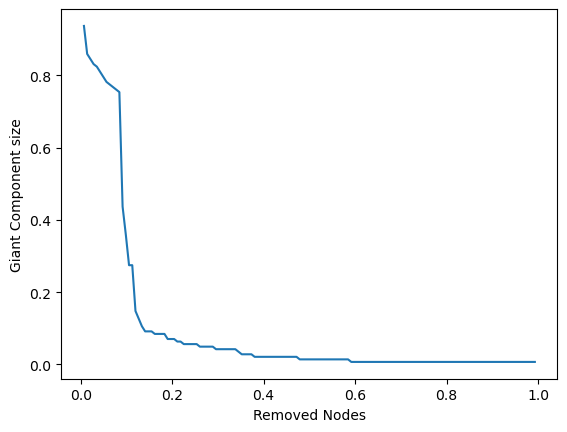

In [66]:
h = g.copy()  # Графын хуулбарыг үүсгэх
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)  # Гармоник төвтэй байдлаар оройнуудыг хасах
plot_dismantle(rn, comps)  # Задрах үйл явцыг дүрслэх

 Дүгнэлт:
    
    Энэхүү кодын хувьд "Game of Thrones буюу Хаадын Тоглоом" цувралын дүрүүдийн харилцан үйлчлэлийн сүлжээг шинжлэх ажлыг гүйцэтгэж байна. 
    Кодын гол зорилго нь сүлжээний тогтвортой байдал, түүний бүтцийн онцлогуудыг судлах явдал юм. 
    Энд бид дараах чухал шинжилгээнүүдийг хийж байна:
      1. Сүлжээний гүүрүүдийг олж тогтоох (хасагдвал сүлжээг хэсэгчлэх ирмэгүүд)
      2. Хөршүүдийн давхцлыг тооцох (нийгмийн бүлэглэлийн хэмжүүр)
      3. Жишиг сүлжээтэй харьцуулах (санамсаргүй болон хэмжээ-бие даасан сүлжээ)
      4. Моллой-Рид параметр ба задрах босгыг тооцох (сүлжээний эмзэг байдал)
      5. Янз бүрийн стратегиудаар (санамсаргүй, зэрэг, төвшилт, гармоник) сүлжээг задалж, тэдгээрийн үр дүнг харьцуулах
    
    Хамгийн сонирхолтой нь, энэ кодоор бид сүлжээний тэсвэрлэх чадвар, төвшилтийн төвтэй байдлын хувьд чухал оройнуудыг 
    судалж байна. Эдгээр шинжилгээнүүд нь "Game of Thrones" цувралын нийгмийн динамикийг ойлгоход туслахаас гадна, 
    бодит амьдрал дахь төвшилсөн сүлжээний эмзэг байдлыг судлахад ч хэрэгтэй. Энэ кодоор өөр өөр төрлийн сүлжээний 
    хооронд харьцуулалт хийж, тэдгээрийн ялгаатай шинж чанарыг тодорхойлох боломжтой юм.